<a href="https://colab.research.google.com/github/RoseSarlake/Computer-Vision/blob/main/CV_Assignment0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.OpenCV_basic.txt



Reading, displaying and writing an image



In [259]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [260]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [261]:
# Load an color image in grayscale
img = cv2.imread("/content/drive/MyDrive/Colab/CV/images/messi.jpg",0)
#print(type(img))

In [262]:
# Write an image
cv2.imwrite("/content/drive/MyDrive/Colab/CV/images/messigray.png",img)

True

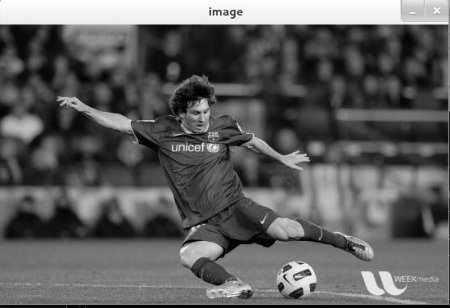

In [263]:
# Display an image
#cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2_imshow(img)
# for PC, if not waitkey, it will only show in very short time
cv2.waitKey(0)
cv2.destroyAllWindows()

Use of keys to manage program execution

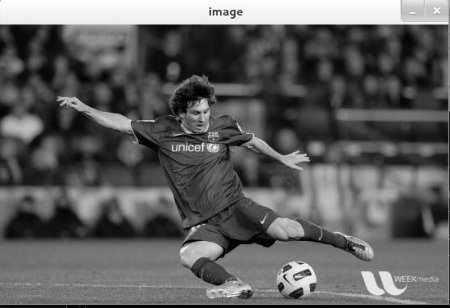

In [264]:
img = cv2.imread("/content/drive/MyDrive/Colab/CV/images/messi.jpg",0)
cv2_imshow(img)

# not works for colab
k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('messigray.png',img)
    cv2.destroyAllWindows()


Matplotlib (Graphics Library)

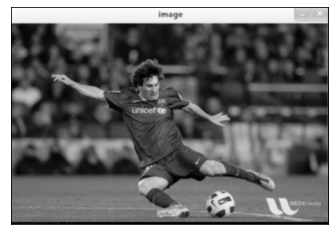

In [265]:
img = cv2.imread("/content/drive/MyDrive/Colab/CV/images/messi.jpg",0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

Drawing on images

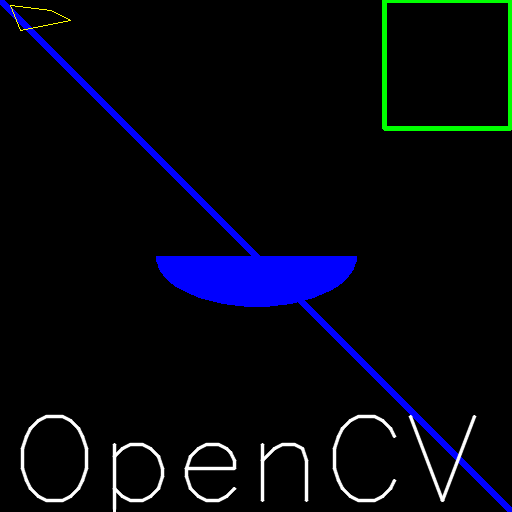

In [266]:
# create a black image
img = np.zeros((512,512,3), np.uint8)
# blue diagonal line with 5 px thickness
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)
# a green rectangle (3 px thickness)
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
# an ellipse
img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
# a yellow polygon
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255))
# add text to the image
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)

cv2_imshow(img)

# 2.matrix simulation

 1)Monoband

In [267]:
def mat_mono():
# create a 256*256 matrix with all 0，and set the data type as unit8
  gray = np.zeros((256,256),dtype="uint8")
# increase the value in both x and y axis to the 255
# based on the coordinates, the top-left is black(0), the bottom-right is white(255)
  for i in range(256):
    for j in range(256):
      gray[i,j]= (i*0.5 + j*0.5)
  cv2_imshow(gray)
# show the matrix
  print ("image shape:"+str(img.shape))
  print(gray)

2)Triband

In [268]:
def mat_tri():
  # create a 256*256 matrix with all 0 in three channels, and define the data type as unit8
  r = np.zeros((256,256),dtype="uint8")
  g = np.zeros((256,256),dtype="uint8")
  b = np.zeros((256,256),dtype="uint8")

  for i in range(256):
    for j in range(256):

      r[i,j]= (i*0.3 + j*0.7)
      g[i,j]= 255-j
      b[i,j]= i
 #merge the three layer in BGR color order
  img = cv2.merge((b,g,r))    
  cv2_imshow(img)
  print ("image shape:"+str(img.shape))
  print(img)

# 3.display several images simultaneosly

1)display two 3 channels images simultaneosly 

In [269]:
def displayMI(img1,img2):
#Resize the first image to 1/4 of original image size
  re_img1 = cv2.resize(img1, (0, 0), None, .25, .25)
#Resize the second image to have the same size with the first one
  re_img2 = cv2.resize(img2, (re_img1.shape[1], re_img1.shape[0]), None, .25, .25)
# Two ways to display：
  #Stack arrays in sequence horizontally
  dis_hstack = np.hstack((re_img1, re_img2))
#Join a sequence of arrays along an existing axis. 
  #axis = 0  vertically, axis = 1 horizontally
  dis_concat = np.concatenate((re_img1, re_img2),axis=0)
# Display image1, image2, and show two images simutaneosly
  print("first image:")
  cv2_imshow(re_img1)
  print("second image:")
  cv2_imshow(re_img2)
  print("two images (hstack method):")
  cv2_imshow(dis_hstack)
  print("two images (concatenate method):")
  cv2_imshow(dis_concat)

2)display monoband and triband image at same time

In [270]:
def displayMIChan(inimg):
# from the 3 channel color image to grayscale image
  grey = cv2.cvtColor(inimg, cv2.COLOR_RGB2GRAY)
# In order to show different channel images simutaneosly, make the grey scale image have three channels
  grey_3_channel = cv2.cvtColor(grey, cv2.COLOR_GRAY2BGR)

# Two ways to display：
  #Stack arrays in sequence horizontally
  dis_hstack = np.hstack((inimg, grey_3_channel))
  #Join a sequence of arrays along an existing axis. 
  #axis = 0  vertically, axis = 1 horizontally
  dis_concat = np.concatenate((inimg, grey_3_channel),axis=1)

# Display original image, greyscale image, and show two images simutaneosly
  print("original image:")
  cv2_imshow(inimg)
  print("greyscale image:")
  cv2_imshow(grey)
  print("two images (hstack method):")
  cv2_imshow(dis_hstack)
  print("two images (concatenate method):")
  cv2_imshow(dis_concat)

# 4.display several images with their titles

Using Matplotlib to create the subplot, the images size can be different.

In [271]:
def displayYtitle(img_1, img_2, title1, title2):
  # change the channals order (see IMPORTANT NOTE)
    b, g, r = cv2.split(img_1)
    img_1 = cv2.merge([r, g, b])
    b, g, r = cv2.split(img_2)
    img_2 = cv2.merge([r, g, b])
  # 1 rows, 2 cols, index 1
    plt.subplot(121)
    plt.imshow(img_1)
  # give the subplot a title1
    plt.title(title1)
  # Get or set the current tick locations and labels of the x-axis. 
  # No need in this case，hide it
    plt.xticks([]), plt.yticks([])
  # 1 rows, 2 cols, index 2
    plt.subplot(122), plt.imshow(img_2), plt.title(title2)
    plt.xticks([]), plt.yticks([])
  # Display the figure
    plt.show()


IMPORTANT NOTE: Due to matplotlib uses RGB color order (not BGR in openCV), colors in our displayed image will be reversed.

cv2.COLOR_BGR2RGB also can be used

# 5.modifies the color of pixels in a list of pixel coordinates

In [272]:
def color_pi(img,x,y,r,g,b):
  # check if the location is out of the image
  if x <= img.shape[0] and y <= image.shape[1]:
    # check if it has the correct rgb value
    if r in range(0,256) and g in range(0,256) and b in range(0,256):
      # change the order from rgb to bgr for opencv display
      img[x,y] = (b,g,r)
    else:
      print("input valid values from 0 to 255")
  else:
    print("out of the image range")
  cv2_imshow(img)
  # save the changed image
  cv2.imwrite("/content/drive/MyDrive/Colab/CV/images/changed.png",img)

# 6.examples

1)displays a matrix of simulated real numbers

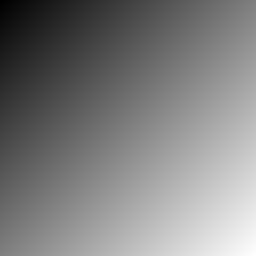

image shape:(512, 512, 3)
[[  0   0   1 ... 126 127 127]
 [  0   1   1 ... 127 127 128]
 [  1   1   2 ... 127 128 128]
 ...
 [126 127 127 ... 253 253 254]
 [127 127 128 ... 253 254 254]
 [127 128 128 ... 254 254 255]]


In [273]:
mat_mono()

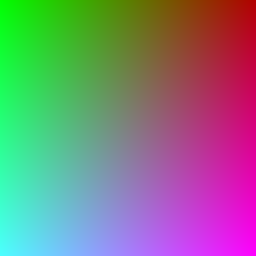

image shape:(256, 256, 3)
[[[  0 255   0]
  [  0 254   0]
  [  0 253   1]
  ...
  [  0   2 177]
  [  0   1 177]
  [  0   0 178]]

 [[  1 255   0]
  [  1 254   1]
  [  1 253   1]
  ...
  [  1   2 177]
  [  1   1 178]
  [  1   0 178]]

 [[  2 255   0]
  [  2 254   1]
  [  2 253   2]
  ...
  [  2   2 177]
  [  2   1 178]
  [  2   0 179]]

 ...

 [[253 255  75]
  [253 254  76]
  [253 253  77]
  ...
  [253   2 253]
  [253   1 253]
  [253   0 254]]

 [[254 255  76]
  [254 254  76]
  [254 253  77]
  ...
  [254   2 253]
  [254   1 254]
  [254   0 254]]

 [[255 255  76]
  [255 254  77]
  [255 253  77]
  ...
  [255   2 253]
  [255   1 254]
  [255   0 255]]]


In [274]:
mat_tri()

2) Display images simultaneosly

first image:


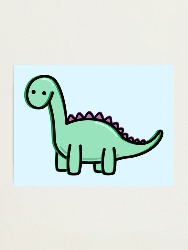

second image:


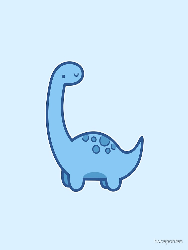

two images (hstack method):


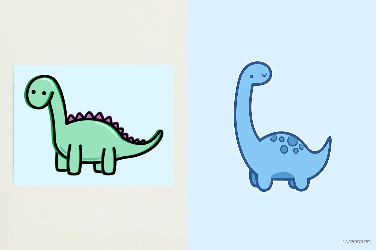

two images (concatenate method):


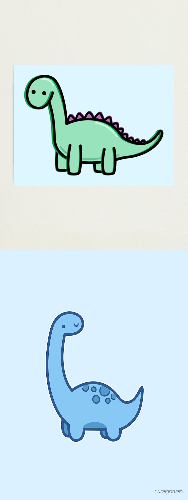

In [275]:
# 3 channals
my_image_1 = cv2.imread("/content/drive/MyDrive/Colab/CV/images/dinog.jpg")
my_image_2 = cv2.imread("/content/drive/MyDrive/Colab/CV/images/dinob.jpg")
displayMI(my_image_1,my_image_2)

original image:


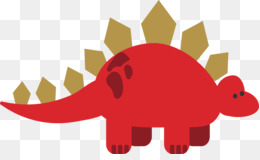

greyscale image:


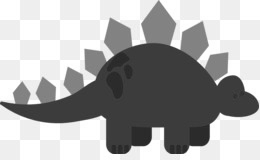

two images (hstack method):


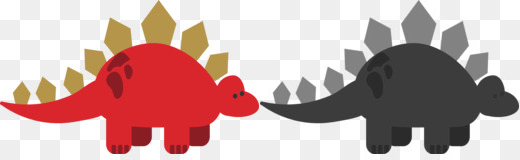

two images (concatenate method):


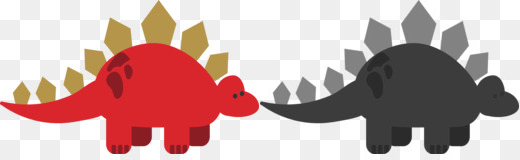

In [276]:
# different channals
my_image_3 = cv2.imread("/content/drive/MyDrive/Colab/CV/images/dinor.jpg")
displayMIChan(my_image_3)

3) Display images with their titles simultaneously

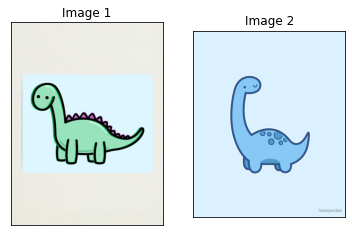

In [277]:
displayYtitle(my_image_1, my_image_2,"Image 1","Image 2")

 4)Modifies the color of pixels

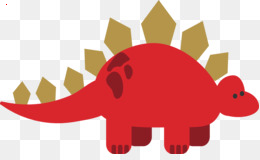

In [278]:
color_pi(my_image_3,4,6,255,0,0)